<font size = "5"> **[Image Tools](2_Image_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


# Selective Fourier Transform


part of 

<font size = "4"> **pyTEMlib**, a **pycroscopy** library </font>


Notebook by 

Gerd Duscher

Materials Science & Engineering<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville


An introduction into Fourier Filtering of images.


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](_.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [ ]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install git+https://github.com/pycroscopy/pyTEMlib/ -q

# pyTEMlib setup ------------------
else:
    if test_package('sidpy') < '0.0.7':
        print('installing sidpy')
        !{sys.executable} -m pip install  --upgrade sidpy -q     
    if test_package('pyNSID') < '0.0.3':
        print('installing pyNSID')
        !{sys.executable} -m pip install  --upgrade pyNSID -q 
    if test_package('pyTEMlib') < '0.2022.10.1':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

## Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets. 



In [1]:
%pylab  notebook
from matplotlib.widgets import RectangleSelector
sys.path.insert(0,'../../')
import pyTEMlib
import pyTEMlib.file_tools as ft
import pyTEMlib.image_tools as it

print('pyTEMlib version: ', pyTEMlib.__version__)
note_book_version = '2021.10.25'
note_book_name='pyTEMib/notebooks/Imaging/Adaptive_Fourier_Filter'

Populating the interactive namespace from numpy and matplotlib
pyTEMlib version:  0.2021.10.2


## Open File

These datasets are stored in the pyNSID data format (extension: hf5) automatically. 

All results can be stored in that file. 

First we select the file

In [2]:
file_widget = ft.FileWidget()

Select(description='Select file:', layout=Layout(width='70%'), options=('.',), rows=10, value='.')

Now, we open and plot them

Select with the moue an area;  rectangle will apear!

/mnt/c/Users/gdusc/Documents/2021-09-01-20210913T151245Z-001/2021-09-01/Nion Swift Library 20210901/Nion Swift Data 13/2021/09/01/20210901-095127/2-HAADF-3.hf5


/home/nyd/.local/lib/python3.8/site-packages/SciFiReaders/readers/SID/Nsid_reader.py:43: FutureWarning: This Reader will eventually be moved to the ScopeReaders package. Be prepared to change your import statements
  warn('This Reader will eventually be moved to the ScopeReaders package'
/home/nyd/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<IPython.core.display.Javascript object>


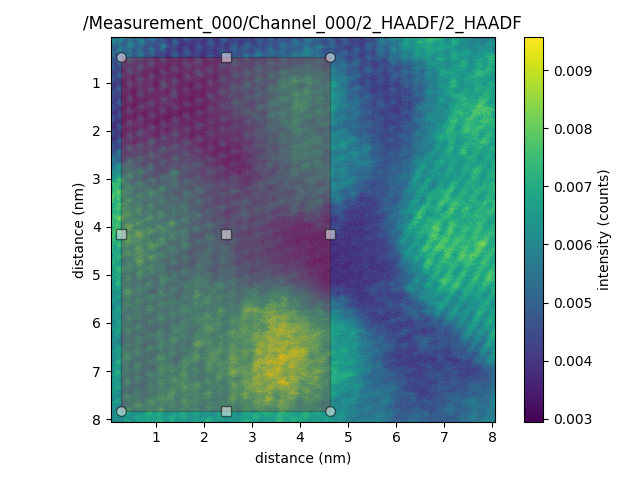

In [4]:
try:
    dataset.h5_dataset.file.close()
except:
    pass
dataset= ft.open_file(file_widget.file_name)
print(file_widget.file_name)
if dataset.data_type.name != 'IMAGE':
    print('We really would need an image here')
dataset.plot()
selector = RectangleSelector(dataset.view.axis, None,interactive=True , drawtype='box')

<IPython.core.display.Javascript object>


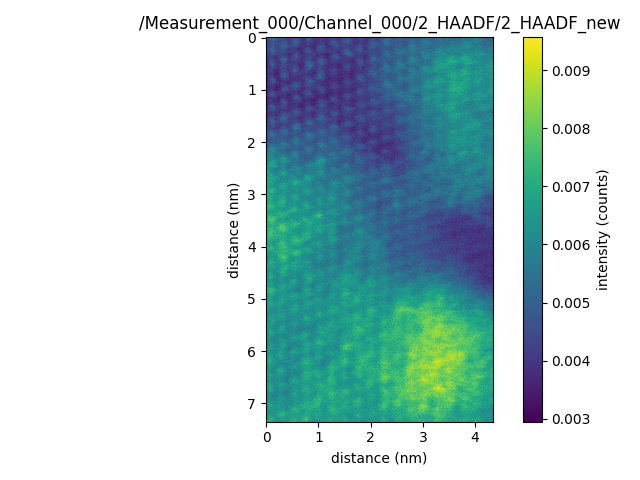

In [5]:
def get_selection(dataset, extents):
    if (np.array(extents) <2).all():
        return dataset
    xmin, xmax, ymin, ymax = selector.extents/(dataset.x[1]-dataset.x[0])
    return dataset.like_data(dataset[int(xmin):int(xmax), int(ymin):int(ymax)])

selection = it.get_selection(dataset, selector.extents)
selection.plot()

## Power Spectrum of Image

fft :
	smoothing : 1
	minimum_intensity : 0.04261075359154022
	maximum_intensity : 1.5140884612372518
source:  /Measurement_000/Channel_000/2_HAADF/2_HAADF_new


<IPython.core.display.Javascript object>


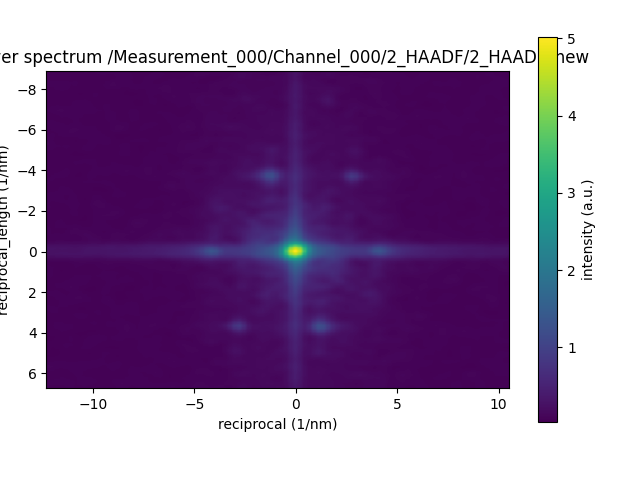

In [6]:
power_spectrum = it.power_spectrum(selection, smoothing=1)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
power_spectrum.plot()



## Spot Detection in Fourier Transform

Found 7 reflections


<IPython.core.display.Javascript object>


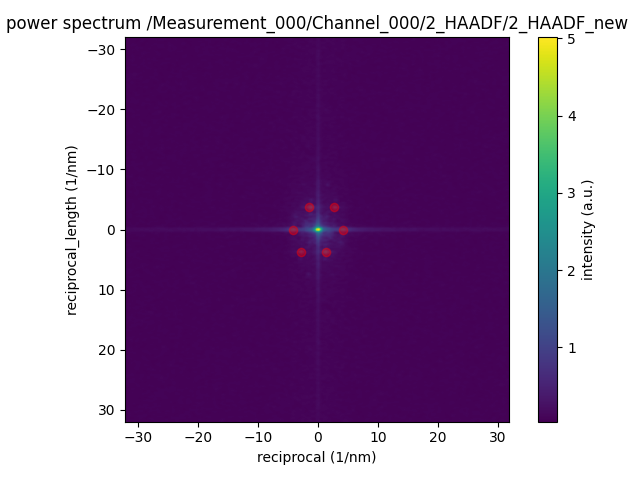

In [19]:
# ------Input----------
spot_threshold=0.1
# ---------------------

spots = it.diffractogram_spots(power_spectrum, spot_threshold=spot_threshold)
spots = spots[np.linalg.norm(spots[:,:2],axis=1)<8,:]
spots = spots[np.linalg.norm(spots[:,:2],axis=1)>0.5,:]
power_spectrum.plot()

plt.gca().scatter(spots[:,0],spots[:,1], color='red', alpha=0.4);

In [20]:
#print(spots[:,:2])
#print(np.round(np.linalg.norm(spots[:,:2], axis=1),2))
#print(np.round(np.degrees(np.arctan2(spots[:,0], spots[:,1])+np.pi)%180,2))
angles=np.arctan2(spots[:,0], spots[:,1])
radius= np.linalg.norm(spots[:,:2], axis=1)
args = angles>0
radii = radius[angles>0]
angles = angles[angles>0]
print(radii, np.degrees(angles))
#print(np.degrees(angles[1]-angles[0]), np.degrees(angles[2]-angles[0]))
#print(1/radii)

[3.92020337 4.14388489 4.59259423] [ 20.63129574  90.         143.02034046]


In [18]:
new_angles = np.round(np.degrees(angles+np.pi-angles[0]+0.0000001)%180,2)
print(new_angles)
print(np.degrees(angles[1]-angles[0]), np.degrees(angles[2]-angles[0]))

-53.02034045871323 -122.38904471827684


In [14]:

angles=np.arctan2(spots[:,0], spots[:,1])
radius= np.linalg.norm(spots[:,:2], axis=1)
args = angles>0
radii = radius[angles>0]
angles = angles[angles>0]
print(radii, np.degrees(angles))

[4.59 4.14 3.92 4.59 4.14 3.92]
[143.02  90.    20.63 143.02  90.    20.63]
[4.59259423 4.14388489 3.92020337] [143.02034046  90.          20.63129574]


In [15]:
# clockwise from up
angles =(-np.degrees(np.arctan2(spots[:,0], spots[:,1]))+180) % 360
spots = spots[np.argsort(angles)]
angles =(-np.degrees(np.arctan2(spots[:,0], spots[:,1]))+180) % 360
plane_distances = 1/np.linalg.norm(spots[:,:2],axis=1)
rolled_angles= np.roll(angles,1) %360
rolled_angles[0] -= 360
relative_angles =  angles - rolled_angles 
print(np.round(plane_distances,3))
print(np.round(relative_angles,1))

[0.218 0.241 0.255 0.218 0.241 0.255]
[57.6 53.  69.4 57.6 53.  69.4]


In [21]:
import pyTEMlib.kinematic_scattering as ks

#Initialize the dictionary of the input
tags_simulation = {}
### Define Crystal
tags_simulation  = ft.read_poscar('./POSCAR.mp-2418_PdSe2')

### Define experimental parameters:
tags_simulation['acceleration_voltage_V'] = 200.0 *1000.0 #V
tags_simulation['new_figure'] = False
tags_simulation['plot FOV'] = 30
tags_simulation['convergence_angle_mrad'] = 0
tags_simulation['zone_hkl'] = np.array([0,0,1])  # incident neares zone axis: defines Laue Zones!!!!
tags_simulation['mistilt']  = np.array([0,0,0])  # mistilt in degrees
tags_simulation['Sg_max'] = .2 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags_simulation['hkl_max'] = 6   # Highest evaluated Miller indices

######################################
# Diffraction Simulation of Crystal #
######################################
import itertools
hkl_list = [list([0, 0, 0])]
spot_dict = {}
for hkl in itertools.product(range(6), repeat=3):
    if list(hkl) not in hkl_list:
        #print(hkl, hkl_list)

        tags_simulation['zone_hkl'] = hkl
        
        ks.kinematic_scattering(tags_simulation, verbose = False)
        if list(tags_simulation['nearest_zone_axes']['0']['hkl']) not in hkl_list:
            print('- ', tags_simulation['nearest_zone_axes']['0']['hkl'])
            
            
            spots = tags_simulation['allowed']['g'][np.linalg.norm(tags_simulation['allowed']['g'][:,:2], axis=1)<4.7,:2]
            angles=np.arctan2(spots[:,0], spots[:,1])
            radius= np.linalg.norm(spots[:,:2], axis=1)
            args = angles>0
            radii = radius[angles>0]
            angles = angles[angles>0]
            spot_dict[hkl] = {"radii": radii, "angles": angles}
            print(radii, np.degrees(angles%np.pi))
        hkl_list.append(list(hkl))

Using kinematic_scattering library version  0.6  by G.Duscher
Symmetry functions of spglib enabled
done
-  [0. 0. 1.]
[3.36393279 3.83960126 3.45159773 3.83960126] [  0.         115.98001194  90.          64.01998806]
done
done
done
done
done
-  [0. 1. 0.]
[2.32962818 4.65925635 2.89923251 2.89923251 4.16421593 3.45159773
 4.16421593] [  0.           0.          36.5312114  143.4687886   55.98293415
  90.         124.01706585]
done
-  [0. 1. 1.]
[3.35132468 3.35132468 4.49071512 3.45159773 4.49071512] [149.00520452  30.99479548 129.77098412  90.          50.22901588]
done
-  [0. 1. 2.]
[4.09105808 4.44017319 2.67629796 2.67629796 4.44017319 4.0121959
 3.45159773 4.0121959 ] [  0.         157.1277171  139.84590274  40.15409726  22.8722829
 120.6523608   90.          59.3476392 ]
done
-  [0. 1. 3.]
[3.45159773] [90.]
done
-  [0. 1. 4.]
[3.55958758 3.95588744 3.95588744 3.45159773] [  0.         154.13444838  25.86555162  90.        ]
done
-  [0. 1. 5.]
[3.55504407 3.9517996  3.45159773] 

/mnt/c/Users/gdusc/Documents/Github/pyTEMlib/notebooks/Imaging/../../pyTEMlib/kinematic_scattering.py:373: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = np.arctan(zone[0] / r)


done
-  [1. 0. 0.]
[4.09184692 3.55989265 3.36393279 4.65925635 2.32962818 4.09184692
 3.55989265] [145.29619318 160.90079208   0.          90.          90.
  34.70380682  19.09920792]
done
-  [1. 0. 1.]
[3.36393279 4.43907859 3.3493859  2.89644177 3.3493859  4.43907859] [  0.         139.27061354 120.14377457  90.          59.85622543
  40.72938646]
done
-  [1. 0. 2.]
[3.36393279 3.95510752 2.67504068 2.67504068 3.95510752 4.48735309
 4.16020755 4.48735309] [  0.         148.2692294  128.95891194  51.04108806  31.7307706
 112.01341827  90.          67.98658173]
done
-  [1. 0. 3.]
[3.36393279] [0.]
done
-  [1. 0. 4.]
[3.36393279 4.010981   4.010981  ] [  0.         114.79295145  65.20704855]
done
-  [1. 0. 5.]
[3.36393279 4.01008545 4.01008545] [  0.         114.79886205  65.20113795]
done
-  [1. 1. 0.]
[4.65925635 2.32962818 4.24437009 3.35122637 2.67588165 2.67588165
 3.35122637 4.24437009] [2.51248265e-15 2.51248265e-15 3.45822406e+01 4.59602776e+01
 6.41955484e+01 1.15804452e+02 1.

done
-  [4. 1. 2.]
[4.09173045 4.43951808 4.24294575] [178.96129445 107.888754    80.75244864]
done
-  [4. 1. 3.]
[3.34967957] [98.67416438]
done
-  [4. 1. 4.]
[3.55978896 3.95496055 2.89655119] [179.39055523 134.42894611  74.15177094]
done
-  [4. 1. 5.]
[3.5577824  3.95574376 2.8936346  3.34936011] [  2.24811622 137.33287178  77.09253702  47.51146365]
done
done
-  [4. 2. 1.]
[3.95495389] [90.]
done
done
-  [4. 2. 3.]
[] []
done
done
-  [4. 2. 5.]
[2.67603777 2.89414652] [109.06005134  66.25928037]
done
-  [4. 3. 0.]
[4.65925635 2.32962818] [2.83236882e-15 2.83236882e-15]
done
-  [4. 3. 1.]
[4.24416687 3.35078133] [44.51112659 55.63047399]
done
-  [4. 3. 2.]
[4.44070733 2.67539037] [142.54445597  82.42857959]
done
-  [4. 3. 3.]
[3.95470948 2.67569164] [136.58758094  90.        ]
done
-  [4. 3. 4.]
[3.95598279 2.89719138] [142.48516523  53.7885543 ]
done
-  [4. 3. 5.]
[3.95265326 2.89481916 4.24482005 4.48780189] [146.73999825  58.199494    33.01464144  86.75232848]
done
done
-  [4. 4. 

In [22]:
spot_dict

{(0, 0, 1): {'radii': array([3.36393279, 3.83960126, 3.45159773, 3.83960126]),
  'angles': array([3.14159265, 2.02423307, 1.57079633, 1.11735958])},
 (0,
  1,
  0): {'radii': array([2.32962818, 4.65925635, 2.89923251, 2.89923251, 4.16421593,
         3.45159773, 4.16421593]), 'angles': array([3.14159265, 3.14159265, 0.63758992, 2.50400273, 0.97708653,
         1.57079633, 2.16450613])},
 (0,
  1,
  1): {'radii': array([3.35132468, 3.35132468, 4.49071512, 3.45159773, 4.49071512]), 'angles': array([2.60063142, 0.54096123, 2.26493095, 1.57079633, 0.87666171])},
 (0,
  1,
  2): {'radii': array([4.09105808, 4.44017319, 2.67629796, 2.67629796, 4.44017319,
         4.0121959 , 3.45159773, 4.0121959 ]), 'angles': array([3.14159265, 2.74239601, 2.44077145, 0.70082121, 0.39919664,
         2.10578095, 1.57079633, 1.03581171])},
 (0, 1, 3): {'radii': array([3.45159773]), 'angles': array([1.57079633])},
 (0, 1, 4): {'radii': array([3.55958758, 3.95588744, 3.95588744, 3.45159773]),
  'angles': arra

In [125]:
for hkl, refl in spot_dict.items():
    if len(refl['radii'])>4:
        print(hkl, 1/refl['radii'])

(0, 1, 0) [0.42925305 0.21462653 0.34491887 0.34491887 0.24014125 0.2897209
 0.24014125]
(0, 1, 1) [0.29838947 0.29838947 0.22268168 0.2897209  0.22268168]
(0, 1, 2) [0.24443554 0.22521644 0.37365047 0.37365047 0.22521644 0.24924007
 0.2897209  0.24924007]
(0, 2, 5) [0.37434128 0.37434128 0.24944479 0.2897209  0.24944479]
(1, 0, 0) [0.24438842 0.28090735 0.2972711  0.21462653 0.42925305 0.24438842
 0.28090735]
(1, 0, 1) [0.2972711  0.22527197 0.29856219 0.3452512  0.29856219 0.22527197]
(1, 0, 2) [0.2972711  0.25283763 0.37382609 0.37382609 0.25283763 0.22284852
 0.24037262 0.22284852]
(1, 1, 0) [0.21462653 0.42925305 0.23560622 0.29839823 0.37370861 0.37370861
 0.29839823 0.23560622]
(1, 1, 2) [0.24442305 0.25277107 0.29851821 0.24934585 0.2403143 ]
(1, 2, 0) [0.21462653 0.42925305 0.22269858 0.24927592 0.26049888 0.24927592
 0.22269858]
(2, 0, 5) [0.2972711  0.25289088 0.37399827 0.37399827 0.25289088]
(2, 1, 0) [0.21462653 0.42925305 0.22521415 0.25281914 0.25281914 0.22521415]


## Log the result

In [ ]:
# results_channel = ft.log_results(dataset.h5_dataset.parent.parent, filtered_dataset)


A tree-like plot of the file

In [ ]:
ft.h5_tree(dataset.h5_dataset.file)

## Close File
let's close the file but keep the filename

In [ ]:
dataset.h5_dataset.file.close()